---
title: "딥러닝 소개 - 인공 신경망 소개"
date: 2020-07-15T10:00:47+09:00
tags:
  - "Basic Data Structures"
  - "Python Basic"
  - "Python"
  - "iteration"
categories:
  - "function"
  - "Python"
  - "Python Basic"
menu: 
  kaggle:
    name: 딥러닝 소개 - 인공 신경망 소개
---


## 공지 
- 본 Tutorial은 교재 `핸즈온 머신러닝 2판`를 활용하여 본 강사로부터 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다.

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶은 분은 반드시 교재를 구매하실 것을 권해드립니다. 
> 책 정말 좋습니다! 꼭 구매하세요!


## 개요
- 인경 신경망은(`Artificial Neural Network`)을 촉발시킨 근원임
  + 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델
- 활용예제
  + 수백만개의 이미지 분류
  + 수백만개의 비디어 추천
  + 매우 복잡한 문제를 풀 때 유용한 머신러닝 모델
- Keras API
  + 케라스는 신경망 구축, 훈련, 평가, 실행을 목적으로 설계된 API이자, 프레임워크


### (1) 주요 환경 설정
- 주요 환경 설정은 아래와 같이 정의합니다. 

In [64]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## I. 퍼셉트론
  - 1957년, 프랑크 로젠플라트가 제안
  - 헤비사이드 계단 함수 (교재, P. 357)
    + 입력의 선형 조합을 계산해 임계값을 기준으로 이진분류 (양성, 음성)
  - 퍼셉트론은 층이 하나뿐인 `TLU(Threshold Logic Unit)`로 구성됨
    + 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때 `완전 연결 층(Fully Connected Layer)` 또는 `밀집 층(Dense Layer)`라고 부름



### (1) 사이킷런 예제
- `Perceptron` 클래스 제공
- 교재 360페이지에 있는 소스 코드보다 아래 소스 코드를 참고
- 사이킷런 향후 버전에서 `max_iter`와 `tol` 매개변수의 기본값이 바뀌기 때문에 경고를 피하기 위해 명시적으로 지정

In [65]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [66]:
y_pred

array([1])

### (2) 다층 퍼셉트론
- (1969년) 마빈 민스키와 시모어 페퍼트는 퍼셉트론의 여러가지 심각한 약점 언급, 특히 간단한 문제도 풀 수 없음 확인
  + 참조: [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
  + 이 때, 퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있음. 이를 `다층 퍼셉트론(MLP)`라고 부름
- 그러나, 다층 퍼셉트론을 훈련할 방법을 찾기 위해 노력했으나 성공하지 못함


### (3) 역전파
- 교재 361페이지 참조
  + 다층 퍼셉트론은 크게 입력-은닉-출력층으로 구성됨
  + 은닉층을 여러개 쌓아 올린 인공 신경망을 심층 신경망(DNN)이라고 부름
- `딥러닝`은 여러개를 쌓아 올리는 심층 신경망을 연구하는 분야임 
- 1986년, 역전파 훈련 알고리즘 소개하는 논문 공개(by 데이비드 루멜하트, 제프리 힌턴, 로날드 윌리엄스)
  + 그레이디언트를 자동으로 계산(자동 미분)하는 경사 하강법
  + 네트워크를 두번 통과함 (정방향, 역방향)
  + 목적은 오차를 감소시키기 위해 각 연결 가중치와 편향값이 어떻게 바뀌어야 할지 알 수 있음
  

### (4) 활성화 함수
- 경사 하강법이 잘 작동할 수 있도록 다층 퍼셉트론 구조에 중요한 변화를 주는데, 이를 활성화 함수라 함
- 활성화 함수의 주 목적은, 문제 해결을 위해 도입된 것
  + 선형 변환을 해도 비선형 문제는 해결하지 못함, (예: 선형회귀와 로지스틱회귀의 차이점)
  + 선형변환에 비선형을 주는 것이 활성화 함수이며, 다만 어떻게 줄 것인지에 따라 종류가 나눠짐
  

In [67]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

그림 저장: activation_functions_plot


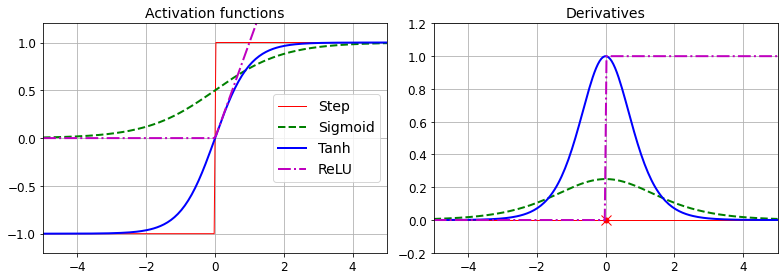

In [68]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

- 하이퍼폴릭 탄젠트 함수: $tanh(z)=2\sigma(2z)-1$. 로지스틱 함수와 같은 `0~1` 사이이고, 출력 범위는 `-1~1` 사이임
- ReLU 함수: $ReLU(z)=max(0,z)$. 연속적이지만, $z=0$에서 미분 가능하지 않음. $z<0$일 경우에는 0이다. 그러나, 실제로 잘 작동하고 계산 속도가 빠르다는 장점이 있어 기본 활성화 함수가 됨.


## II. 회귀를 위한 다층 퍼셉트론(MLP)
- 회귀 모형에 적용 가능, 이 때에는 출력 뉴런이 하나만 필요함
- 뉴런의 출력값이 예측값임. 
- 회귀 MLP의 구조는 아래와 같음

| 하이퍼파라미터 	| 일반적인 값 	|
|:-:	|:-:	|
| 입력 뉴런 수 	| 특성마다 하나|
| 은닉층 수 	| 문제에 따라 다름 (1~5)|
| 은닉층의 뉴런 수 	| 문제에 따라 다름 (10~100)|
| 출력 뉴런 수 	| 예측 차원마다 하나 |
| 은닉층의 활성화 함수 	| 주로 ReLU |
| 출력층의 활성화 함수 	| 없음. 또는 출력이 양수일 때, ReLU/softplus|
| 손실 함수 	| MSE |



In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4875 - val_loss: 0.4656

- 모형의 그래프를 그려본다. 

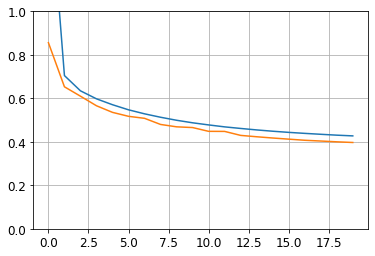

In [72]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- 마지막으로 예측값을 적용한다.

In [73]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

## III. 분류를 위한 다층 퍼셉트론(MLP)
- 이진 분류 문제는 로지스틱 활성화 함수를 가진 하나의 출력 뉴런만 필요
- 다층 퍼셉트론은 다중 레이블 이진 분류 문제를 쉽게 처리할 수 있도록 함
  + 이 때, 두개의 출력 뉴런이 필요
  + 만약, 다중분류이면, 다중분류의 숫자만큼 출력 뉴런이 필요함
- 분류 MLP의 전형적인 구조는 다음과 같다. 
| 하이퍼파라미터 	| 이진분류 	| 다중 레이블 분류 	| 다중 분류 	|
|:-:	|:-:	|:-:	|:-:	|
| 입력층과 은닉층 	| 회귀와 동일 | 회귀와 동일 	| 회귀와 동일|
| 출력 뉴런 수 	| 1개 | 레이블마다 1개 	| 클래스마다 1개|
| 출력층의 활성화 함수 	| 로지스틱 함수 | 로지스틱 함수 	| 소프트맥스 함수|
| 손실함수 	| 크로스 엔트로피 | 크로스 엔트로피 	| 크로스 엔트로피|

### (1) 모듈 불러오기
- 모듈을 불러옵니다. 

In [74]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


### (2) 데이터 불러오기
- `Fashion MNIST`를 불러옵니다. 

In [75]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

- 이미지의 크기는 `28 x 28`크기의 배열이다. 
- 또한 픽셀 강도가 실수(0.0에서 255.0까지)가 아니라 정수(0에서 255까지)로 표현되어 있다. 

In [76]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


### (3) 데이터셋 분리
- 훈련데이터와 테스트 데이터로 분리합니다. 
- 간편하게 픽셀 강도를 `255.0`으로 나누너 `0~1` 사이 범위로 조정함. 

In [77]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

- 이제 예측하려는 레이블을 확인해보자. 

In [78]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

- 각 단계별 레이블 이름을 다음과 같이 정의한다. 

In [79]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

- 훈련 세트에 있는 첫번째 이미지 이름은 코트이다. 

In [80]:
class_names[y_train[0]]

'Coat'

- 모형 학습 전, 데이터세트의 크기가 동일한지 확인한다. 

In [81]:
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


- 위 `28, 28`이 다르면 모형 예측이 되지 않는다. 

### (4) 데이터 시각화
- 시각화를 통해, 실제 이미지가 어떻게 생겼는지 확인해본다. 

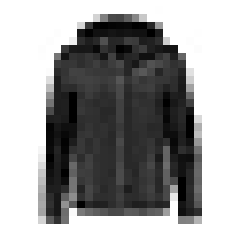

In [82]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

- 조금 더 자세하게 데이터를 출력해보자. 

그림 저장: fashion_mnist_plot


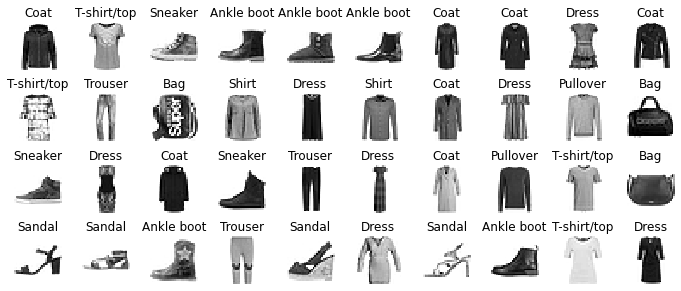

In [83]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

### (5) 모형 만들기
- 이제 신경망 모형을 만든다. 

In [84]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- 위 모형에 대한 구체적인 설명은 교재 `373 페이지`를 확인한다. 


In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

- 코드는 일종의 실험 재현성을 위한 코드이다.  

In [86]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

- `summary()`메서드는 모델에 있는 모든 층을 출력함

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


- 모형이 만들어가지는 과정을 출력할 수 있다. 

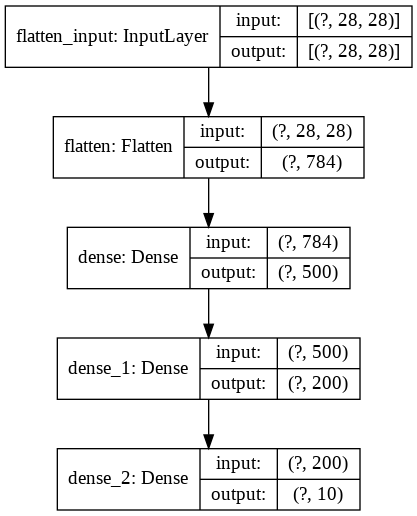

In [88]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### (6) 모델 컴파일
- 모델을 만들고 나서 `compile()` 메서드를 호출하여 사용할 손실 함수와 옵티마이저(`optimizer`)를 지정한다. 

In [89]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

- 위 모형에 대한 구체적인 설명은 `교재 377페이지`를 참고한다. 

### (7) 모델 훈련
- 케라스는 에포크 횟수를 전달함
- 에포크가 끝날 때 마다 검증 세트를 사용해 손실과 추가적인 측정 지표를 계산

In [90]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6979 - accuracy: 0.7736 - val_loss: 0.5135 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4783 - accuracy: 0.8328 - val_loss: 0.4305 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4339 - accuracy: 0.8465 - val_loss: 0.5329 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4075 - accuracy: 0.8577 - val_loss: 0.3879 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3888 - accuracy: 0.8636 - val_loss: 0.3735 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3697 - accuracy: 0.8689 - val_loss: 0.3670 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3576 - accuracy: 0.8731 - val_loss: 0.3623 - val_accuracy:

- 모형을 만들고 훈련 시키는 것은 위 과정이 전부이다.
- 그러나, 초보자들이 흔히 하는 실수는 훈련 데이터와 검증 데이터의 크기가 맞지 않을 때 예외가 발생한다. 

### (8) 모델 평가
- 이제 모델을 평가합니다. 모델을 평가할 때는 보통 시각화를 통해서 확인합니다. 
- 그리고, `evaluate()` 함수를 사용합니다. 

그림 저장: keras_learning_curves_plot


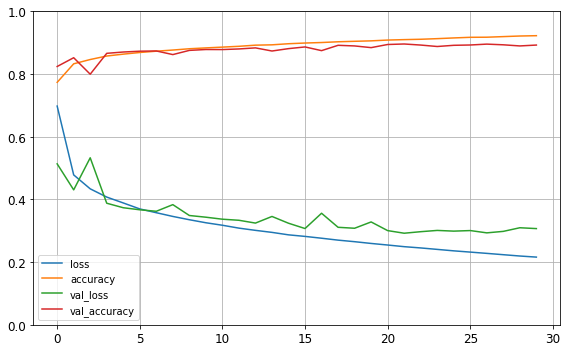

In [91]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

- 훈련 손실과 검증 손실은 감소하며, 또한 검증 곡선이 훈련 곡선과 가까우면, 과대적합하지 않았다는 증거가 된다. 


In [92]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8822


[0.33835071325302124, 0.8822000026702881]

### (9) 모델 예측
- 이제 `predict()` 함수를 사용해 새로운 샘플에 대해 예측을 만든다. 
- 새로운 샘플은 존재하지 않기 때문에 처음 3개의 샘플만 사용한다. 

In [93]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[[0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.98]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


- 가장 높은 확률을 가진 클래스에만 관심이 있다면, `predict_classes()` 사용한다. 

In [94]:
# y_new = y_test[:3]
# y_new

- 실제 학습한 코드가 제대로 분류 되었는지 실제 이미지를 확인하는 

*   항목 추가
*   항목 추가

차원에서의 코드를 다음과 같이 구현한다. 

그림 저장: fashion_mnist_images_plot


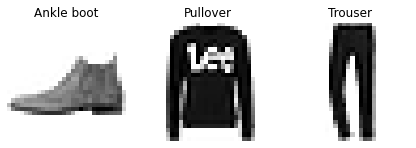

In [95]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## IV. 금일 과제
- 교재를 참조하여 아래 예제를 연습한다. 
  + 함수형 API 모델 만들기
  + 모형의 저장과 복원
  + 훈련 과정에서의 Callback 사용하기


## V. What's Next
- 다음 시간에는 심층 신경망에 대해 학습하도록 한다. 